# Initialize the library

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [33]:
import os
print(os.getcwd())


/Users/sohanurrahman/Desktop/College/Workshop/Introduction_to_Machine_Learning


In [34]:
# Define the paths for training and validation datasets
base_dir = 'Rock-Paper-Scissors'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'validation')

paper_dir = os.path.join(train_dir, 'paper')
rock_dir = os.path.join(train_dir, 'rock')
scissors_dir = os.path.join(train_dir, 'scissors')

paper_imgs = os.listdir(paper_dir)
rock_imgs = os.listdir(rock_dir)
scissors_imgs = os.listdir(scissors_dir)

# Create ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

BATCH_SIZE = 32
TARGET_SIZE = 128


# Load training dataset
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                    batch_size=BATCH_SIZE, 
                                                    shuffle=True,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                       target_size=(TARGET_SIZE, TARGET_SIZE), 
                                                       batch_size=BATCH_SIZE, 
                                                       shuffle=True,
                                                       class_mode='categorical')
# Load test dataset (validation folder)
test_generator = validation_datagen.flow_from_directory(test_dir,
                                                        target_size=(TARGET_SIZE, TARGET_SIZE),
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=False,  # Test data shouldn't be shuffled
                                                        class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


# Showing some sample dataset

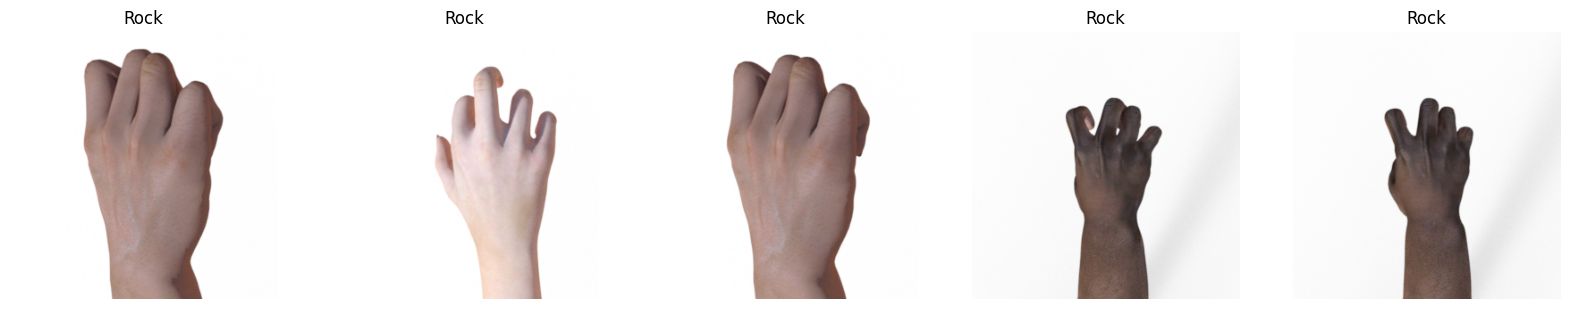

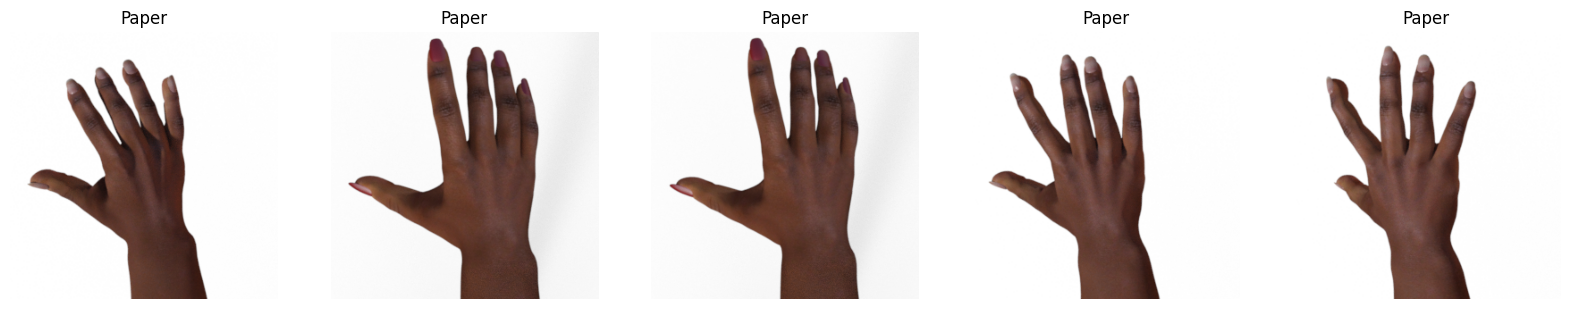

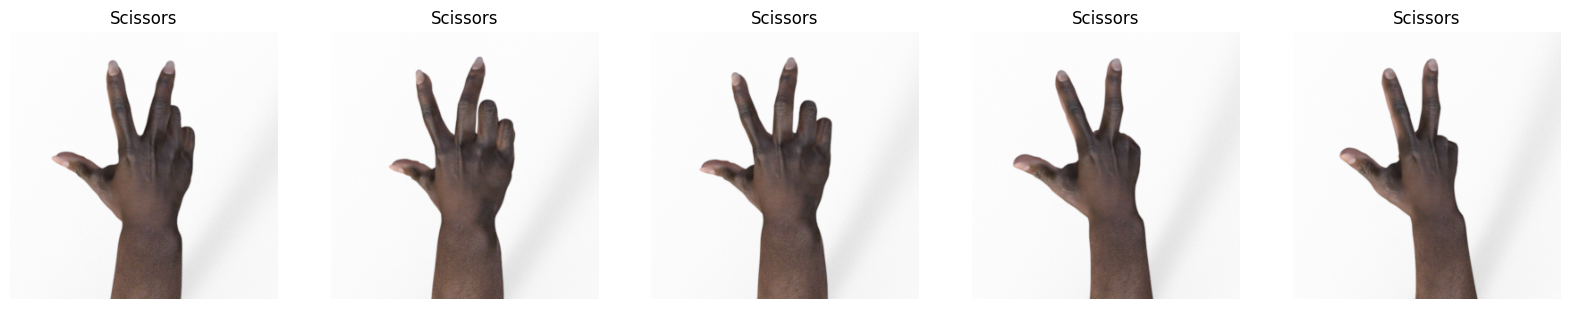

In [35]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to plot images
def plot_images_from_dir(image_list, class_name, image_dir, num_images=5):
    plt.figure(figsize=(20, 4))
    for i, img_name in enumerate(image_list[:num_images]):
        sp = plt.subplot(1, num_images, i+1)
        img = mpimg.imread(os.path.join(image_dir, img_name))
        plt.imshow(img)
        plt.title(class_name)  # Display the class name (e.g., Rock, Paper, Scissors)
        plt.axis('off')  # Hide axes
    plt.show()

# Plot 5 images from each class
plot_images_from_dir(rock_imgs, 'Rock', rock_dir)
plot_images_from_dir(paper_imgs, 'Paper', paper_dir)
plot_images_from_dir(scissors_imgs, 'Scissors', scissors_dir)


In [36]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
import tensorflow.keras.optimizers as optimizers

# Define a simpler Sequential model
# model = models.Sequential()

# # Convolutional layer with fewer filters and pooling
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
# model.add(layers.MaxPooling2D((2, 2)))

# # Another convolutional layer
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten the output before passing to fully connected layers
# model.add(layers.Flatten())

# # Fully connected layer (Dense layer)
# model.add(layers.Dense(64, activation='relu'))

# # Output layer for 3 classes (rock, paper, scissors)
# model.add(layers.Dense(3, activation='softmax'))

model = models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE, TARGET_SIZE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))


optimizer = optimizers.Adam(0.0001)
# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()



/Users/sohanurrahman/Desktop/College/Workshop/Introduction_to_Machine_Learning/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,735 (3.14 MB)

 Trainable params: 822,735 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(
    train_generator,  # Use the generator for training data
    validation_data=validation_generator,  # Use the generator for validation data
    epochs=3,
    verbose=1
)

/Users/sohanurrahman/Desktop/College/Workshop/Introduction_to_Machine_Learning/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.3614 - loss: 1.1075 - val_accuracy: 0.5484 - val_loss: 1.0734
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.5316 - loss: 1.0197 - val_accuracy: 0.6075 - val_loss: 0.9729
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.6299 - loss: 0.9172 - val_accuracy: 0.5941 - val_loss: 0.9314


# Use the model we created

In [38]:
print("[INFO] serializing network...")
model.save("model.h5")


[INFO] serializing network...


In [39]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
print("[INFO] loading model...")
model = load_model("model.h5")

# Define the image directory and target size for preprocessing
  # Update with your base directory
input_image_dir = f"{base_dir}/validation/"

# Iterate through images in the directory
for ima in os.listdir(input_image_dir):
    if ima.endswith(".png"):
        img_path = os.path.join(input_image_dir, ima)
        print(f"Processing image: {img_path}")  # Debugging: print the file path
        
        if os.path.exists(img_path):  # Check if the file actually exists
            # Load and preprocess the input image
            img = image.load_img(img_path, target_size=(TARGET_SIZE, TARGET_SIZE))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array /= 255.0  # Normalize image (same as during training)

            # Make a prediction
            predictions = model.predict(img_array)
            predicted_class = np.argmax(predictions, axis=1)

            # Output the predicted class
            class_labels = {0: 'rock', 1: 'paper', 2: 'scissors'}
            print(f"Image: {ima} - Predicted class: {class_labels[predicted_class[0]]}")
        else:
            print(f"[ERROR] File not found: {img_path}")  # Debugging: print error if file doesn't exist



[INFO] loading model...
Processing image: Rock-Paper-Scissors/validation/scissors-hires1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: scissors-hires1.png - Predicted class: scissors
Processing image: Rock-Paper-Scissors/validation/scissors-hires2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Image: scissors-hires2.png - Predicted class: scissors
Processing image: Rock-Paper-Scissors/validation/rock3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Image: rock3.png - Predicted class: paper
Processing image: Rock-Paper-Scissors/validation/paper4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Image: paper4.png - Predicted class: scissors
Processing image: Rock-Paper-Scissors/validation/paper5.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Image: paper5.png - Predicted class: scissors
Processing image: Rock-Paper-Scissors/validation/rock2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Image: rock2.png - Predicted class: paper
Processing image: Rock-Paper-Scissors/validation/paper7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

# saving the model

# Test loss and Accuracy

# Create ImageGenrator on Random images